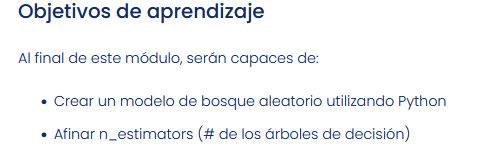

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
#Importen un regresor de bosque aleatorio
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
filename = "/content/drive/MyDrive/Data CodingDojo/cali_housing.csv"
df = pd.read_csv(filename)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


train test split

In [ ]:
X = df.drop(columns = "MedHouseVal")

y = df["MedHouseVal"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

1. importar modelo a utilizar

In [ ]:
# modelo ya importado
# from sklearn.ensemble import RandomForestRegressor

2. hacer instancia del modelo

In [ ]:
rf = RandomForestRegressor(random_state=42)

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

los hiperparametros de importancia son max_depth y n_estimators =100

3. entrenar modelo en los datos, almacenando informacion aprendida

el modelo esta aprendiendo la relacion entre X e y, esto puede tomar un tiempo para ejecutar

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

4. Predecir los valores para y ( Recuerden que este paso permite ver las predicciones reales, pero no es necesario para evaluar o afinar el modelo)

In [ ]:
rf.predict(X_test)

array([0.50262  , 0.7139   , 4.9008466, ..., 1.23913  , 3.0341205,
       4.1185512])

5. Evaluar el rendimiento del modelo

In [ ]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9726163038386978
0.8078655075367563


lo primero que debemos observar es cuanto el modelo de bosque alreatorio mejoro el valor de R2 comparado con nuestro sencillo arbol de decision. En nuestra clase anterior, el mejor valor R2 que pudimos alcanzar en nuestro conjunto de prueba fue de solo 0,691 como se muestra al final de clase Arboles de regresion


Afinar modelos:

ajustar max_depth

Como lo hicimos anteriormente, podemos afinar max_depth que permitimos para cada arbol en nuestro bosque aleatorio. Establezcamos max_depth a 9 y evaluemos nuestros resutlados

In [ ]:
rf_9 = RandomForestRegressor(max_depth = 9, random_state = 42)
rf_9.fit(X_train, y_train)
rf_9_train_score = rf_9.score(X_train, y_train)
rf_9_test_score = rf_9.score(X_test, y_test)
print(rf_9_train_score)
print(rf_9_test_score)


0.8422908368094096
0.7659811625575986


Tengan en cuenta que si bien nuestros resultados con un max_depth de 9 fueron optimos para cada arbol, esto no es el caso para el bosque aleatorio (Nuestra puntuacion de prueba disminuyo)

Para ver cual era la profundidad de cada arbol en el bosque aleatorio cuando el max_depth era ilimitado, pueden usar el siguietne codigo:

In [ ]:
[estimator.get_depth() for estimator in rf.estimators_]

pueden intentar diferentes valores para max_depth yu otros parametros para ver si pueden ser mejores en el modelo por defecto

## Afinar n_estimators (# de los arboles de decision) 

Otro ajsto de parametro es n_estimators, el cual representa el numero de los arboles que deben crecer, Puede que se demore el codigo de abajo en ejecutar. La razon es que cuando entrenan un conjunto, estan entrenando mas de un modelo (en esta caso, un arbol)

Observemos si podemos mejorar la puntuacion al doblar la cantidad e arboles de 100 a 200

In [ ]:
rf_200 = RandomForestRegressor(n_estimators =200, random_state=42)
#ajustar
rf_200.fit(X_train, y_train)
#obtener puntuaciones
rf_200_train_score = rf_200.score(X_train,y_train)
rf_200_test_score = rf_200.score(X_test, y_test)
print(rf_200_train_score)
print(rf_200_test_score)

0.9736509892150341
0.8094576239469162


En este caso, apentas teniamos una mejore perceptible con 200 arboles comparado con los 100 arboles por defecto. Esto dependera de sus datos.